In [3]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics



data=pd.read_csv('kc_house_data.csv')




# Data Pre-Processing

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Voir les différents types de données que nous avons dans nôtre dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
#Afficher toute les lignes et la somme de leurs valeurs nulle
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#Nous allons supprimer les colonnes que nius jugeons inutile pour nôtre modèle(Id,zipcode,lat,long)
df=data
del df['id']
del df['zipcode']
del df['lat']
del df['long']

In [8]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [21]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df['Month'] = df['date'].apply(lambda date: date.month)
df['Year'] = df['date'].apply(lambda date: date.year)

In [25]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,2,2015


In [26]:
df.drop('date',inplace=True,axis=1)

# Data Visualisation


<AxesSubplot:xlabel='price', ylabel='Count'>

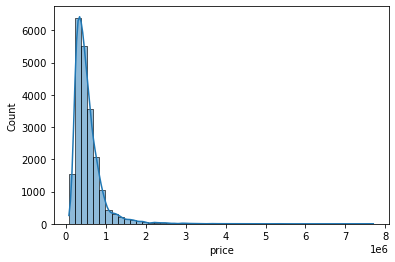

In [11]:
sns.histplot(df['price'],kde=True,bins=50)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

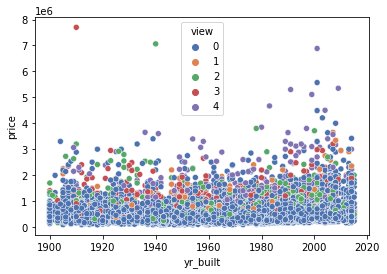

In [12]:
sns.scatterplot(x='yr_built',y='price',data=df,hue='view',palette = 'deep')

<AxesSubplot:xlabel='Year', ylabel='price'>

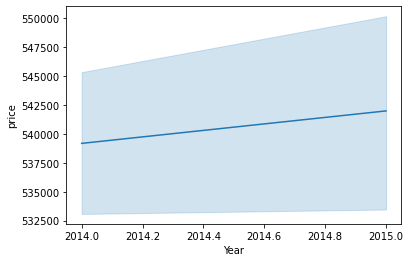

In [27]:
sns.lineplot(x='Year',y='price',data=df)

On remarque une augmentation des prix au fil des années 


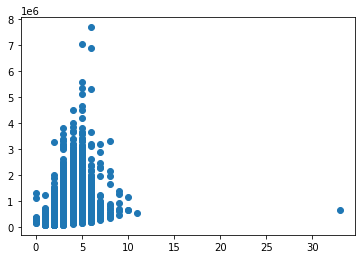

In [10]:
plt.scatter(data["bedrooms"] ,data["price"])

In [11]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

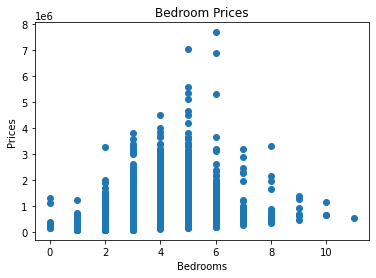

In [19]:
#On remarque avoir un outliers on va donc faire la visualisation sans cette valeur 
plt.xlabel("Bedrooms")
plt.ylabel("Prices")
plt.title("Bedroom Prices")
data=data[data['bedrooms']!=33]
plt.scatter(data["bedrooms"] ,data["price"])

On remarque que le nombre de chambre n'influe pas plus que cela sur le prix car d'autres paramètres entre en jeux tel que la superficie des pièces

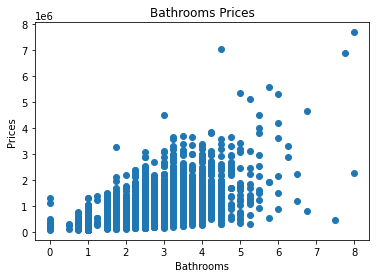

In [20]:
plt.xlabel("Bathrooms")
plt.ylabel("Prices")
plt.title("Bathrooms Prices")
plt.scatter(data["bathrooms"] ,data["price"])


On constate une corrélation positive entre le nombres de salle de bain et les prix des maisons 

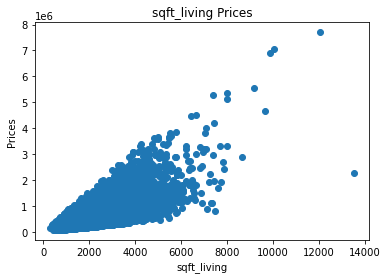

In [21]:
plt.xlabel("sqft_living")
plt.ylabel("Prices")
plt.title("sqft_living Prices")
plt.scatter(data["sqft_living"] ,data["price"])

On constate une corrélation positive entre la superficie du salon et les prix des maisons 

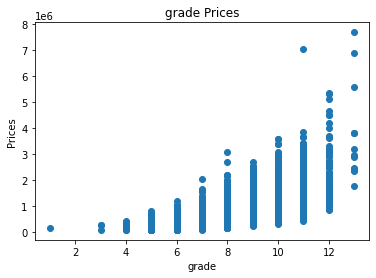

In [22]:
plt.xlabel("grade")
plt.ylabel("Prices")
plt.title("grade Prices")
plt.scatter(data["grade"] ,data["price"])

De même pour le grade plus ce dernier est élevé plus on a tendance à payer cher 

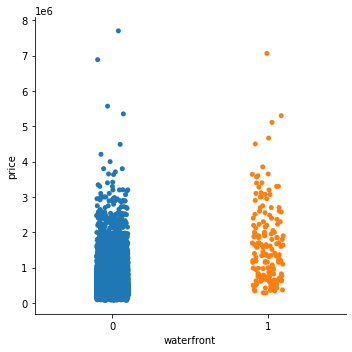

In [17]:
sns.catplot(x='waterfront',y='price',data=df)

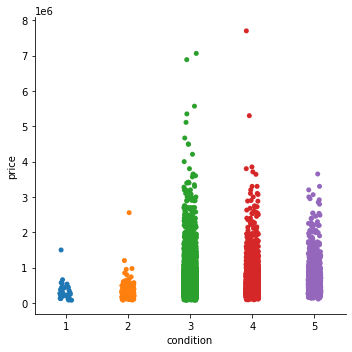

In [18]:
sns.catplot(x='condition',y='price',data=data)

Plus la condition de la maison est bien plus les gens sont susceptibles de payer plus chère 

In [23]:
#Matrice de correlation 
def plot_correlation_map( df ):

    corr = df.corr()
  
    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax,  annot = True, annot_kws = { 'fontsize' : 12 } )
    

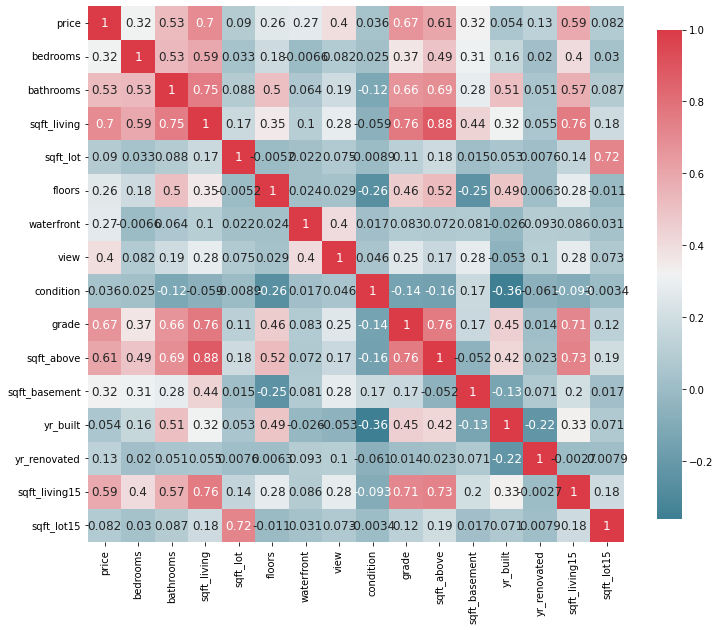

In [24]:
plot_correlation_map(data)

La matrice de corrélation nous résume les corrélations entre les différents features .
On remarque alors que nôtre target features qui est le prix a une bonne corélation avec les paramètres suivant : Bathrooms , sqrft-living, grade and sqrft_above 

# Modèle de Regression 

## Linear Regression

In [28]:
x=data['sqft_living'].values.reshape(-1,1)
y=data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30,random_state=30)

In [29]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print(predicted)


[531999.48449953 624386.10444637 624386.10444637 ... 484406.37725418
 416936.14874755 484406.37725418]


In [30]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 67842222652.74759
R squared 0.5008750980131821


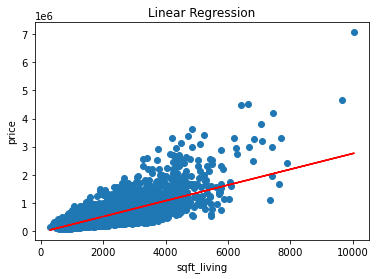

In [31]:
plt.scatter(x_test.squeeze(),y_test,label="data points")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x_test,model.predict(x_test),color="r")
plt.show()

In [32]:
score_lr = model.score(x_train,y_train)
print(score_lr)

0.48936121749772743


In [42]:
preco_lr = df['price']
predict_lr = pd.Series(predicted)
error_lr = preco_lr-predict_lr
data_lr = {'Price':preco_lr,'Predictions':predict_lr,'Error':error_lr}
data_prev_lr = pd.DataFrame(data_lr)
data_prev_lr.head()

,Price,Predictions,Error
0,221900.0,497794.738943,-275894.738943
1,538000.0,524643.730928,13356.269072
2,180000.0,601414.196312,-421414.196312
3,604000.0,671884.933573,-67884.933573
4,510000.0,517308.142984,-7308.142984


## Multi-Linear Regression

In [33]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [34]:
x=data[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].values
y=data['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30,random_state=30)

In [35]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [36]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 50731996078.54691
R squared 0.626757473735645


## Polynomial Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

x=data['sqft_living'].values.reshape(-1,1)
y=data['price']

lg=LinearRegression()
poly = PolynomialFeatures(degree=3)

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30,random_state=30)  #splitting data

x_train_fit = poly.fit_transform(x_train) #transforming our input data
x_test_ = poly.fit_transform(x_test)

lg.fit(x_train_fit, y_train) # Fitting Polynomial Regression to the dataset 

predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  59720940172.12406
R squared:  0.5606245307948381


## Polynomial Multi-Regression

In [41]:
x=data[['grade','sqft_living','sqft_above','bathrooms']]
y=data['price'].values

lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30,random_state=30)  #splitting data

x_train_fit = poly.fit_transform(x_train) #transforming our input data
x_test_ = poly.fit_transform(x_test)

lg.fit(x_train_fit, y_train) # Fitting Polynomial Regression to the dataset 
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  51939675001.706856
R squared:  0.6178724077607416


In [43]:
preco_lr = df['price']
predict_lr = pd.Series(predicted)
error_lr = preco_lr-predict_lr
data_lr = {'Price':preco_lr,'Predictions':predict_lr,'Error':error_lr}
data_prev_lr = pd.DataFrame(data_lr)
data_prev_lr.head()

,Price,Predictions,Error
0,221900.0,497794.738943,-275894.738943
1,538000.0,524643.730928,13356.269072
2,180000.0,601414.196312,-421414.196312
3,604000.0,671884.933573,-67884.933573
4,510000.0,517308.142984,-7308.142984


En comparant entre les différentes régression on remarque qu'on a été capable de minimiser la MSE et d'augmenter le R squared car le prix d'une maison dépend de plusieurs facteurs et est mieux traduit par un modele polynomial 
